In [1]:
# reveal.js presentation configuration
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

# import utility libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)
#pd.core.format.set_option('notebook_repr_html',True)
pd.set_option('display.max_rows', 10)

# pretty print function
def pp(obj):
    print (pd.DataFrame(obj))
    
%matplotlib inline


# Playing with word2vec

[Thamar Solorio](http://solorio.uh.edu), University of Houston

## Google News dataset

* Internal Google data set with 100 billion words
* Model includes embeddings for 3 million words and phrases. Words with frequency below 5 were discarded.
* 300-dimensions representation was obtained by training a skip-gram model.
* Model available at https://code.google.com/archive/p/word2vec/

## Loading the model with `gensim`

In [2]:
import gensim.models
model = gensim.models.KeyedVectors.load_word2vec_format('..//GNvectors.bin', binary=True)

## Continuous representation of words

In [3]:
pp(model['table'])
pp(model['chair'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]
            0
0    0.118652
1   -0.375000
2    0.161133
3    0.002151
4   -0.001877
..        ...
295 -0.234375
296  0.198242
297  0.261719
298  0.120117
299  0.171875

[300 rows x 1 columns]


## Semantically related words have similar representations

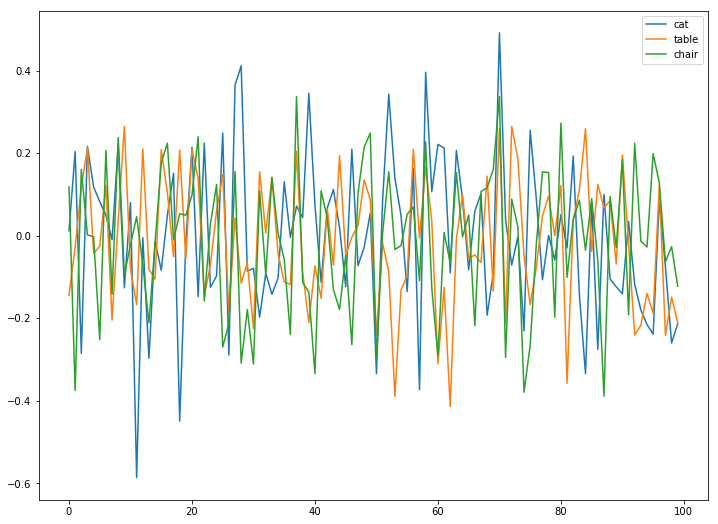

In [4]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(model['cat'][:100], label = 'cat')
plt.plot(model['table'][:100], label = 'table')
plt.plot(model['chair'][:100], label = 'chair')
plt.legend()

In [5]:
model.similarity('cat', 'table')

0.099595615953379901

In [6]:
model.similarity('table', 'chair')

0.30385528031546366

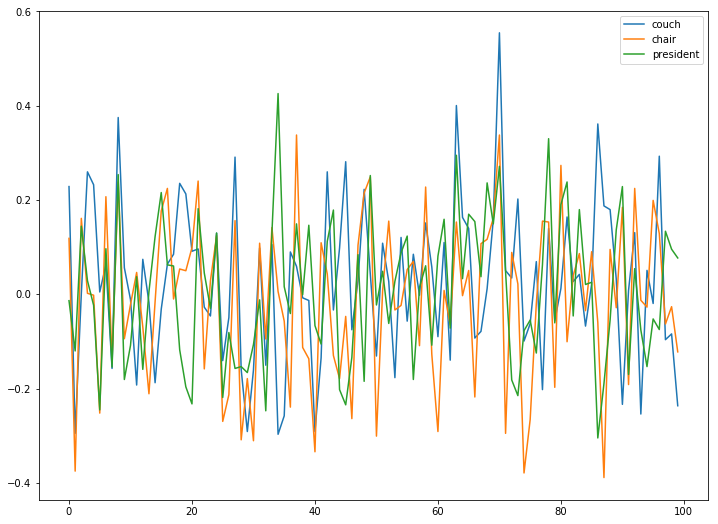

In [7]:
plt.plot(model['couch'][:100], label = 'couch')
plt.plot(model['chair'][:100], label = 'chair')
plt.plot(model['president'][:100], label = 'president')
plt.legend()

# Vector representation similarity = semantic similarity

In [8]:
pp(model.most_similar(positive=[u'table']))

                          0         1
0                    tables  0.695064
1  ConocoPhillips_BPAmerica  0.495105
2      Capitalized_Included  0.466654
3                      tray  0.465346
4               dining_room  0.458311
5                 banquette  0.445573
6          rapping_cappella  0.443531
7                 sideboard  0.443410
8          linen_tablecloth  0.442205
9                    Tables  0.441955


## Word vector space encodes linguistic regularities

<img width= 600 src="linguistic regularities.jpg">

## Solving analogies

* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

$$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [9]:
result = model.most_similar(negative=['man'], 
                            positive=['woman', 'king'])
pp(result)

               0         1
0          queen  0.711819
1        monarch  0.618967
2       princess  0.590243
3   crown_prince  0.549946
4         prince  0.537732
5          kings  0.523684
6  Queen_Consort  0.523595
7         queens  0.518113
8         sultan  0.509859
9       monarchy  0.508741


More subtle knowledge?

In [10]:
result = model.most_similar(negative=['power'], 
                            positive=['president'])
pp(result)

                    0         1
0           President  0.549469
1     chief_executive  0.486291
2                 CEO  0.479329
3      vice_president  0.471838
4            chairman  0.460117
5      Vice_President  0.455405
6  Executive_Director  0.448104
7             founder  0.434294
8   managing_director  0.430064
9           executive  0.426406


## Finding Presidents

In [22]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [23]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['Canada','Bangladesh','China','Colombia', 'El_Salvador','Germany', 'France', 'India','Mexico','Nepal']
presidents = [analogy('USA', 'President_Barack_Obama', country) for country in countries]
for c, p in zip(countries,presidents):
    print(c,p)

Canada Prime_Minister_Stephen_Harper
Bangladesh Prime_Minister_Sheikh_Hasina
China Premier_Wen_Jiabao
Colombia President_Alvaro_Uribe
El_Salvador elect_Barack_Obama
Germany Chancellor_Angela_Merkel
France President_Nicolas_Sarkozy
India Prime_Minister_Manmohan_Singh
Mexico President_Felipe_Calderon
Nepal King_Gyanendra


## President_of vector

20


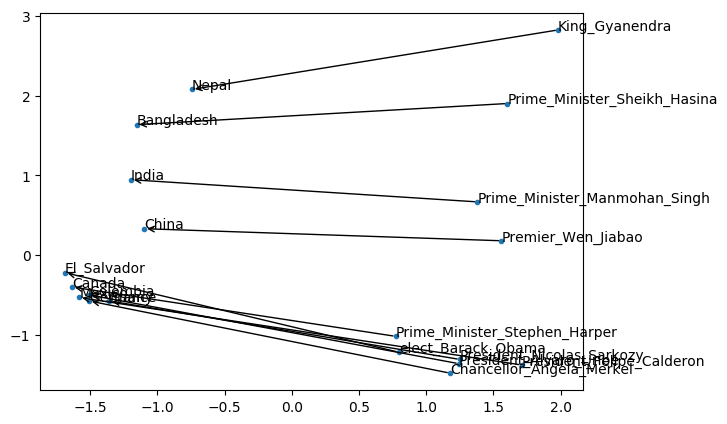

In [24]:
labels = countries + presidents
data = [model[w] for w in labels]
print(len(data))
plot_data(data, labels)

## Compositionality

In [25]:
 pp(model.most_similar(positive=['Texas', 'river']))

                   0         1
0       Brazos_River  0.677258
1         Rio_Grande  0.638057
2              creek  0.633022
3       Neches_River  0.615708
4  Mississippi_River  0.603492
5       Cibolo_Creek  0.602457
6               lake  0.591458
7       Concho_River  0.583619
8         Lake_Lavon  0.582258
9      Washita_River  0.579532


In [27]:
 pp(model.most_similar(positive=['democrat', 'news']))

                        0         1
0               democrats  0.573318
1              lamestream  0.530538
2             john_mccain  0.507568
3              politician  0.495114
4              republican  0.495072
5        liberal_democrat  0.494150
6  Latest_Tanker_Operator  0.492670
7                Democrat  0.490246
8             MCOT_online  0.483101
9               politican  0.473065


# What about Polysemy?

In [28]:
model.wv.most_similar_cosmul(positive=['chair'], topn=50)

[('chairs', 0.8935651779174805),
 ('Chair', 0.8744211196899414),
 ('chairperson', 0.8150923848152161),
 ('chairwoman', 0.8135672211647034),
 ('chairman', 0.8080711960792542),
 ('Vice_Chair', 0.7823325395584106),
 ('Co_Chair', 0.773489773273468),
 ('chairing', 0.7715873718261719),
 ('Chairs', 0.769778847694397),
 ('cochair', 0.7642453908920288),
 ('Chairperson', 0.7609165906906128),
 ('chariman', 0.7553058862686157),
 ('chaired', 0.7542940378189087),
 ('member', 0.7496194839477539),
 ('chairmanship', 0.7482100129127502),
 ('cochairs', 0.7457972764968872),
 ('director', 0.7434978485107422),
 ('cochairman', 0.7398712635040283),
 ('convener', 0.7391637563705444),
 ('head', 0.7390000820159912),
 ('Chairman', 0.729647159576416),
 ('chairmain', 0.7288178205490112),
 ('Chairwoman', 0.7261125445365906),
 ('ex_officio_member', 0.7253902554512024),
 ('sofa', 0.7228622436523438),
 ('cochaired', 0.7207540273666382),
 ('executive', 0.7207496762275696),
 ('Toronto_JP_Riccardi', 0.7204341292381287),
 

## Visualizing embeddings with t-sne

* We will visualize the 2000 most frequent words in English (http://www.rupert.id.au/resources/4000-most-common-english-words-csv.csv).

In [37]:
target_words = [line.strip().lower() for line in open("4000-most-common-english-words-csv.csv")][:1500]
words = [word for word in target_words if word in model] 
target_matrix = np.array([model[word] for word in words])

* t-Distributed Stochastic Neighbor Embedding (t-SNE) dimensionality reduction tecnique Well suited for the visualization of high-dimensional datasets (http://lvdmaaten.github.io/tsne/code/tsne_python.zip)

In [40]:
from tsne import tsne
reduced_matrix = tsne(target_matrix, 2);

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1495 ...
Computing P-values for point  500  of  1495 ...
Computing P-values for point  1000  of  1495 ...
Mean value of sigma:  0.584167274982
Iteration  10 : error is  19.8024277174
Iteration  20 : error is  19.0261620061
Iteration  30 : error is  18.641756829
Iteration  40 : error is  18.8671487071
Iteration  50 : error is  18.8053981152
Iteration  60 : error is  18.8647488533
Iteration  70 : error is  18.8954465609
Iteration  80 : error is  18.8604897758
Iteration  90 : error is  18.6555757896
Iteration  100 : error is  18.7903954518
Iteration  110 : error is  2.6139731905
Iteration  120 : error is  2.13596807473
Iteration  130 : error is  1.89387551768
Iteration  140 : error is  1.77194445973
Iteration  150 : error is  1.69230009719
Iteration  160 : error is  1.63413421985
Iteration  170 : error is  1.5890573735
Iteration  180 : error is  1.5543329623
Iteration  190 : error is  

In [41]:
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

In [22]:
print len(reduced_matrix)

1495


## Visualization

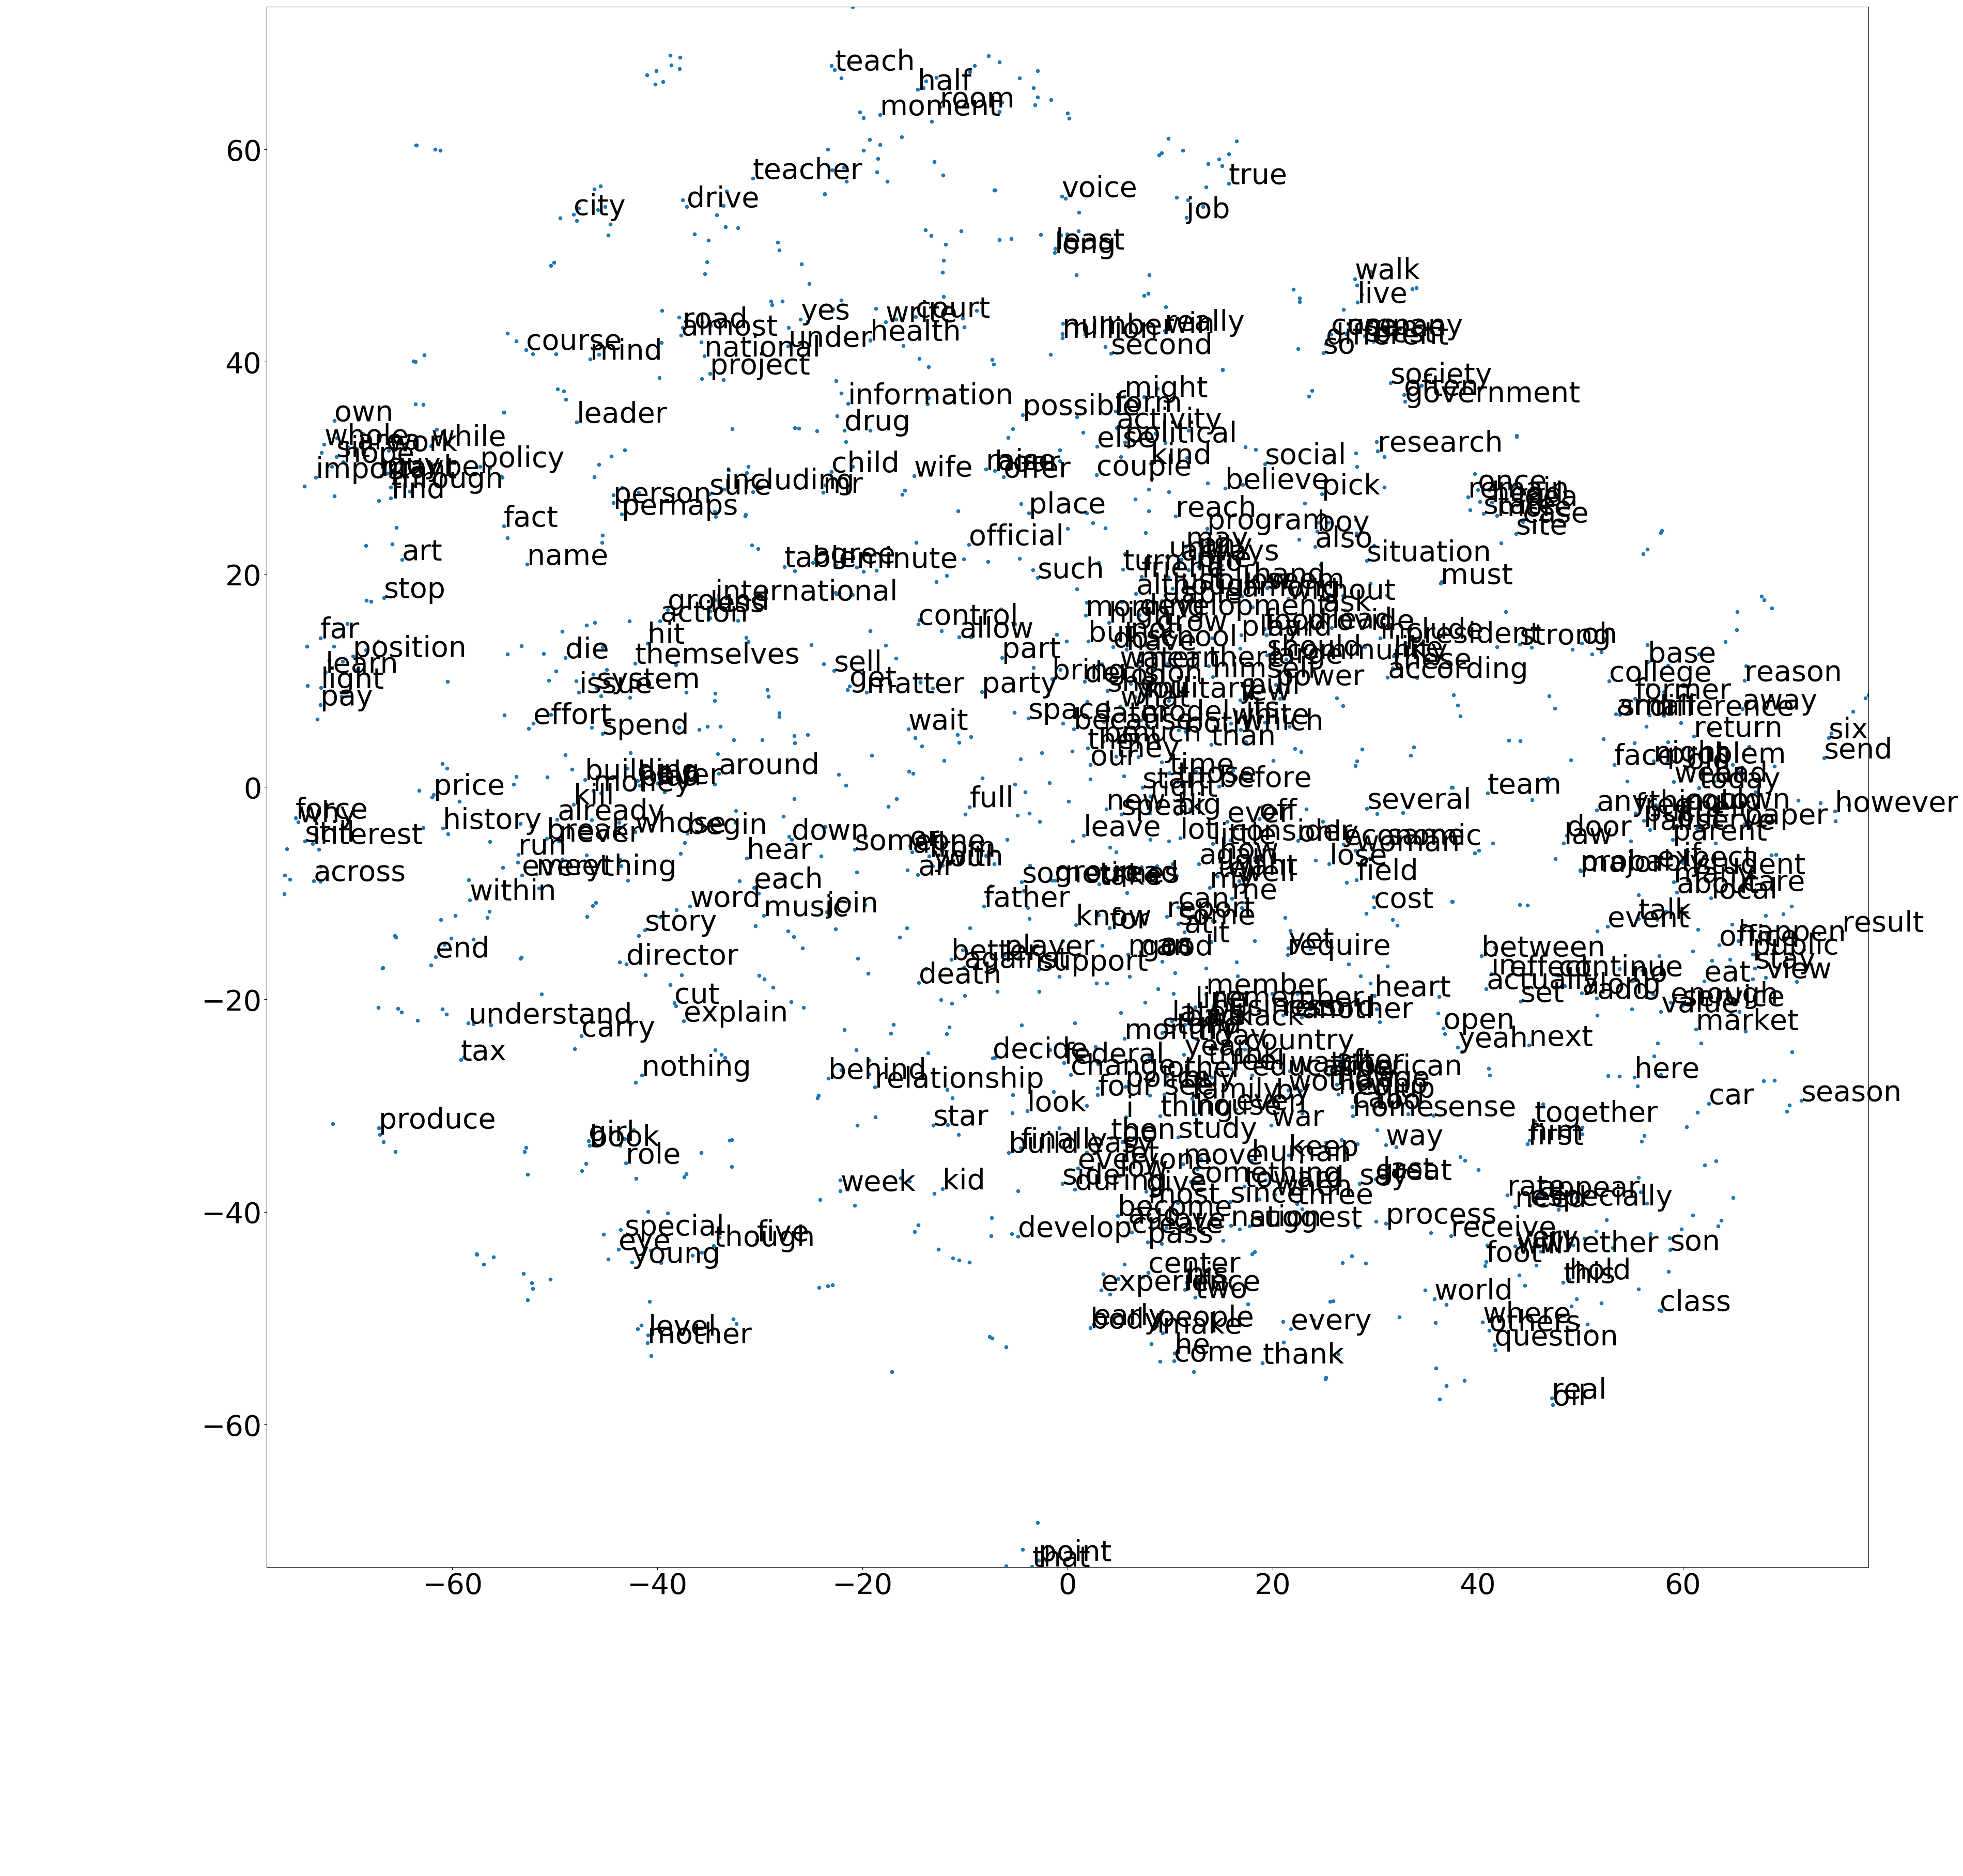

In [27]:
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(40, 40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for idx, word in enumerate(words[1:500]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    plt.annotate(word, (x,y))